In [224]:
#import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

def Pw2(x):
    return np.power(x,2)

In [225]:
# Pt1 formule e costanti 

def t0_fit(b,phi,sb = 0,sphi = 0):
    #t0  = -phi/b*180/pi
    t0  = (2*pi-phi)/b*180/pi
    db   = -phi/Pw2(b) *sb
    dphi = -1/b        *sphi
    st0 = np.sqrt(Pw2(db) + Pw2(dphi))*180/pi
    return t0,st0

In [226]:
# Pt1
name  =  ['Data/L2.csv','Data/L4.csv']
title = ['$Fit\    \dfrac{\lambda}{2}$','$Fit\    \dfrac{\lambda}{4}$']

bounds_min =[[0,0,4000,-1000],  
             [0,0,3000,-1000]]
bounds_max =[[3,10,15000,1000],
             [3,10,15000,3000]] 

array_t0  = np.asarray([])

def func_fit(x,b,phi,A,c):
    I = A*Pw2(np.cos(b*x + phi)) + c
    return I

Chi2 =  152.09264399061647 | Reduced Chi2 =  6.913301999573476
theta_0 = 30.68278496659215 +- 0.1461313494710521 °


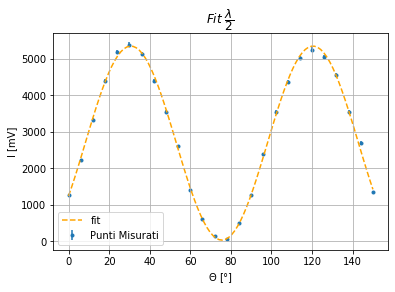

Chi2 =  2132.0565412279966 | Reduced Chi2 =  88.83568921783319
theta_0 = 35.48773342461671 +- 0.39611621198348224 °


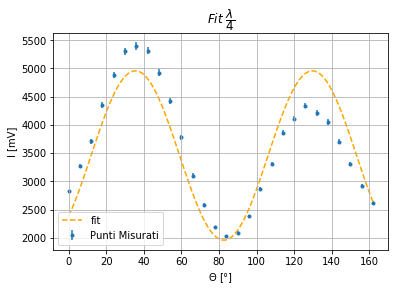

In [227]:
for T in range(len(name)):

    df= pd.read_csv(name[T])
    theta = np.asarray(df.iloc[:,0])*pi/180
    I  = np.asarray(df.iloc[:,1])
    
    X = theta
    Y = I
    sY = 0.006*Y + 0.005*Y + 4
    
    #Fit 
    [b,phi,A,c],pcov = s.optimize.curve_fit(func_fit,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = (bounds_min[T],bounds_max[T]))
    #[b,phi,A,c],pcov = s.optimize.curve_fit(func_fit,X,Y,sigma = sY,absolute_sigma = True)
    [sb,sphi,sA,sc] = np.sqrt(np.diag(pcov))

    Yexp  = func_fit(X,b,phi,A,c)
    chi2  = np.sum( ( (Yexp - Y)/sY )**2 )
    chi2r = chi2/(len(X)-4) #3 parametri
    
    #Misure dervate
   
    theta0,stheta0 = t0_fit(b,phi,sb = sb,sphi = sphi)
    AAA = '{} +- {}'.format(theta0,stheta0)
    array_t0 = np.append(array_t0,AAA)
    
    #plot 
    x = np.linspace(np.min(X),np.max(X),100)
    y = func_fit(x,b,phi,A,c)
    
    plt.errorbar(X*180/pi,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
    plt.plot(x*180/pi,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)

    plt.title(title[T])
    plt.xlabel('$\Theta$ [°]')
    plt.ylabel('I [mV]')
    plt.grid()
    plt.legend(loc = 'lower left')
    
    #print(b,phi,A,c)
    print('Chi2 = ',chi2,'| Reduced Chi2 = ',chi2r)
    print('theta_0 =',AAA,'°')
    plt.show()


In [197]:
Results = pd.DataFrame({'':title,'$\theta_0 \pm \sigma$':array_t0})
#print(Results.to_latex(index=False))
Results

,,$\theta_0 \pm \sigma$
0,$Fit\ \dfrac{\lambda}{2}$,30.68278496659215 +- 0.1461313494710521
1,$Fit\ \dfrac{\lambda}{4}$,35.48773342461671 +- 0.39611621198348224


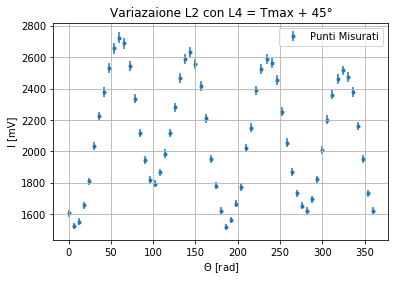

In [198]:
# Variazaione L2 con L4 = Tmax + 45°
name = 'Data/VarL2.csv'
df= pd.read_csv(name)
theta = np.asarray(df.iloc[:,0])*pi/180
I  = np.asarray(df.iloc[:,1])
    
X = theta
Y = I
sY = 0.006*Y + 0.005*Y + 4

plt.errorbar(X*180/pi,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
#plt.plot(x*180/pi,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)

plt.title('Variazaione L2 con L4 = Tmax + 45°')
plt.xlabel('$\Theta$ [rad]')
plt.ylabel('I [mV]')
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

In [212]:
# Pt 3
def Stokes(I1,I1p,I2,I3):
    I0  = I1 + I1p
    I2p = I0 - I2
    I3p = I0 - I3

    S1 = (2*I1 - I0)/I0
    S2 = (2*I2 - I0)/I0
    S3 = (2*I3 - I0)/I0
    V = np.sqrt(Pw2(S1) + Pw2(S2) + Pw2(S3))
    return V

In [213]:
# Coeff stokes [mV] massimo alto

I1,I1p,I2,I3 = 85,5351,2672,2311
print('[max alto] V =',Stokes(I1,I1p,I2,I3))

[max alto] V = 0.9803781122571619


In [214]:
# Coeff stokes [mV] massimo basso

I1,I1p,I2,I3 = 60,4260,2611,1860
print('[max basso] V =',Stokes(I1,I1p,I2,I3))

[max basso] V = 1.00404286073183


In [216]:
# Coeff stokes [mV] massimo alto  laser a vuoto

I1,I1p,I2,I3 = 7046,5468,729,3324
print('Laser a vuoto')
print('[max alto] V =',Stokes(I1,I1p,I2,I3))

Laser a vuoto
[max alto] V = 1.0080613034381138


In [217]:
# Coeff stokes [mV] massimo alto  laser 45
I1,I1p,I2,I3 = 1305,124,456,938
print('Laser 45')
print('[max alto 45] V =',Stokes(I1,I1p,I2,I3))

Laser 45
[max alto 45] V = 0.9548632204035575


In [220]:
# Coeff stokes [mV] massimo alto  laser 90   QUESTO NON VIENE CAZZO 
I1,I1p,I2,I3 = 2930,337,1315,562
print('Laser 90')
print('[max alto 90] V =',Stokes(I1,I1p,I2,I3))

Laser 90
[max alto 45] V = 1.0548750296243625


In [221]:
# Coeff stokes [mV] massimo alto  laser 101    
I1,I1p,I2,I3 = 3188,1140,1881,275
print('Laser 101')
print('[max alto 101] V =',Stokes(I1,I1p,I2,I3))

Laser 101
[max alto 90] V = 1.0015032810187947


In [222]:
# Coeff stokes [mV] massimo alto  laser CRISTALLO   
I1,I1p,I2,I3 = 2970,3980,579,2108
print('Laser cristallo')
print('[max alto crisallo] V =',Stokes(I1,I1p,I2,I3))

Laser cristallo
[max alto crisallo] V = 0.9329481313148249
